<a href="https://colab.research.google.com/github/Turtle-Grace/gracehuangtw/blob/main/0317_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: Pandas & NumPy with Student Performance Dataset
## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.

Load all three datasets into Python.
Identify differences and discrepancies between the datasets.

1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.

In [ ]:
import pandas as pd

df1 = pd.read_csv('Student Data Part 1 mv.csv')
df2 = pd.read_csv('Student Data Part 2 mv.csv')
df3 = pd.read_csv('Student Data Part 3 mv.csv')

display(df1.head())
display(df2.head())
display(df3.head())


,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources
0,1,23,84,8.0,Low,High
1,2,19,64,9.0,Low,Medium
2,3,24,98,8.0,Medium,Medium
3,4,29,89,9.0,Low,Medium
4,5,19,92,7.0,Medium,Medium


,Unnamed: 0,Student_ID,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type
0,743,744,Available,1.0,Medium,Medium,Public
1,5551,5552,Available,2.0,Low,High,Public
2,3442,3443,Available,1.0,Medium,Medium,Public
3,6571,6572,Available,0.0,Low,Low,Public
4,4204,4205,Available,2.0,High,Medium,Public


,Student_ID,Final_Score,Parental_Education_Level,Distance_from_Home,Gender
0,1,65.0,High School,Close,Male
1,2,59.0,College,Medium,Female
2,3,72.0,Postgraduate,Close,Male
3,4,69.0,High School,Medium,Male
4,5,68.0,College,Close,Female


3. Reconstruct the original dataset by:
3-1. Adjusting column names and data types.


In [ ]:
#Column Names and Data Types
print("DataFrame Shapes and Data Types:")
print("df1:", df1.shape, "\n", df1.dtypes)
print("\n")
print("df2:", df2.shape, "\n", df2.dtypes)
print("\n")
print("df3:", df3.shape, "\n", df3.dtypes)
print("\n")

#Remove the Column Unnamed:0

if 'Unnamed: 0' in df2.columns:
    del df2["Unnamed: 0"]

# Missing Values
print("Missing Values:")
for df_name, df in zip(['df1', 'df2', 'df3'], [df1, df2, df3]):
    print(f"\n{df_name}:")
    for col in df.columns:
        missing_pct = df[col].isnull().sum() / len(df) * 100
        if missing_pct > 0:
            print(f"{col}: {missing_pct:.2f}% missing")

# Descriptive Statistics
print("\nDescriptive Statistics:")
print("df1:\n", df1.describe(include='all'))
print("\n")
print("df2:\n", df2.describe(include='all'))
print("\n")
print("df3:\n", df3.describe(include='all'))
print("\n")



DataFrame Shapes and Data Types:
df1: (6607, 6) 
 Student_ID                int64
Study_Hours               int64
Attendance                int64
Rest_Hours              float64
Parental_Involvement     object
Access_to_Resources      object
dtype: object


df2: (5616, 7) 
 Unnamed: 0             int64
Student_ID             int64
Internet_Access       object
Tutoring_Sessions    float64
Family_Income         object
Teacher_Quality       object
School_Type           object
dtype: object


df3: (6607, 5) 
 Student_ID                    int64
Final_Score                 float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object


Missing Values:

df1:
Rest_Hours: 4.99% missing

df2:
Internet_Access: 5.00% missing
Tutoring_Sessions: 5.00% missing
Teacher_Quality: 1.18% missing

df3:
Final_Score: 4.99% missing
Parental_Education_Level: 1.36% missing
Distance_from_Home: 1.01% missing

Descriptive Statistics:
df1:
       

3-2. Correctly merging the datasets.


In [ ]:
merged_all = (
    df1.merge(df2, on=["Student_ID"], how="outer")
       .merge(df3, on=["Student_ID"], how="outer")
)

display(merged_all.head())


,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Final_Score,Parental_Education_Level,Distance_from_Home,Gender
0,1,23,84,8.0,Low,High,Available,0.0,Low,Medium,Public,65.0,High School,Close,Male
1,2,19,64,9.0,Low,Medium,Available,2.0,Medium,Medium,Public,59.0,College,Medium,Female
2,3,24,98,8.0,Medium,Medium,Available,2.0,Medium,Medium,Public,72.0,Postgraduate,Close,Male
3,4,29,89,9.0,Low,Medium,Available,1.0,Medium,Medium,Public,69.0,High School,Medium,Male
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN,68.0,College,Close,Female


3-3. Handling missing values (imputation) and justifying your chosen method.

In [ ]:
merged_all.isnull().sum()
merged_all.dtypes
merged_all[col] = merged_all[col].fillna(0)



#numeric

for col in merged_all.select_dtypes(include=["int", "float"]).columns:
    merged_all[col] = merged_all[col].fillna(merged_all[col].mean())

#categorical

for col in merged_all.select_dtypes(include=["object"]).columns:
    mode_value = merged_all[col].mode(dropna=True)
    if not mode_value.empty:
        merged_all[col] = merged_all[col].fillna(mode_value[0])
    else:
        merged_all[col] = merged_all[col].fillna("Unknown")


In [ ]:
display(merged_all.head())

,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Final_Score,Parental_Education_Level,Distance_from_Home,Gender
0,1,23,84,8.0,Low,High,Available,0.00000,Low,Medium,Public,65.0,High School,Close,Male
1,2,19,64,9.0,Low,Medium,Available,2.00000,Medium,Medium,Public,59.0,College,Medium,Female
2,3,24,98,8.0,Medium,Medium,Available,2.00000,Medium,Medium,Public,72.0,Postgraduate,Close,Male
3,4,29,89,9.0,Low,Medium,Available,1.00000,Medium,Medium,Public,69.0,High School,Medium,Male
4,5,19,92,7.0,Medium,Medium,Available,1.48866,Medium,Medium,Public,68.0,College,Close,Female


### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Rest_Hours) and the exam grade (Final_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.

In [ ]:

df = pd.DataFrame(merged_all)

lower_threshold = df["Rest_Hours"].quantile(0.03)  # bottom 3%
upper_threshold = df["Rest_Hours"].quantile(0.97)  # top 3%

#Filter out rows below or above those thresholds
df_no_outliers = df[
    (df["Rest_Hours"] >= lower_threshold) &
    (df["Rest_Hours"] <= upper_threshold)
]

#Check how many rows were removed
print("Original DF shape:", df.shape)
print("DF without outliers shape:", df_no_outliers.shape)

#Calculate the correlation between Sleep_Hours and Exam_Score
correlation_matrix = df_no_outliers[["Rest_Hours", "Final_Score"]].corr()
correlation_value = correlation_matrix.loc["Rest_Hours", "Final_Score"]

print("Correlation between Rest_Hours and Final_Score (no outliers):", correlation_value)

import numpy as np
from scipy.stats import shapiro

rest_stat, rest_pvalue = shapiro(df_no_outliers["Rest_Hours"])
final_stat, final_pvalue = shapiro(df_no_outliers["Final_Score"])

print(f"Rest_Hours Shapiro p-value: {rest_pvalue:.4f}")
print(f"Final_Score Shapiro p-value: {final_pvalue:.4f}")

#reject the null hypothesis of “data are normally distributed.”

#Decide correlation based on normality
if rest_pvalue > 0.05 and final_pvalue > 0.05:
    # Both are likely normal
    corr_method = "pearson"
    print("Both variables appear normally distributed. Using Pearson correlation.")
else:
    # One or both are non-normal
    corr_method = "spearman"
    print("At least one variable is not normally distributed. Using Spearman correlation.")

#Calculate correlation
correlation = df_no_outliers[["Rest_Hours", "Final_Score"]].corr(method=corr_method)
corr_value = correlation.loc["Rest_Hours", "Final_Score"]

print(f"Correlation ({corr_method.capitalize()}): {corr_value:.4f}")


Original DF shape: (6607, 15)
DF without outliers shape: (6607, 15)
Correlation between Rest_Hours and Final_Score (no outliers): -0.013608582503877168
Rest_Hours Shapiro p-value: 0.0000
Final_Score Shapiro p-value: 0.0000
At least one variable is not normally distributed. Using Spearman correlation.
Correlation (Spearman): 0.0009


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

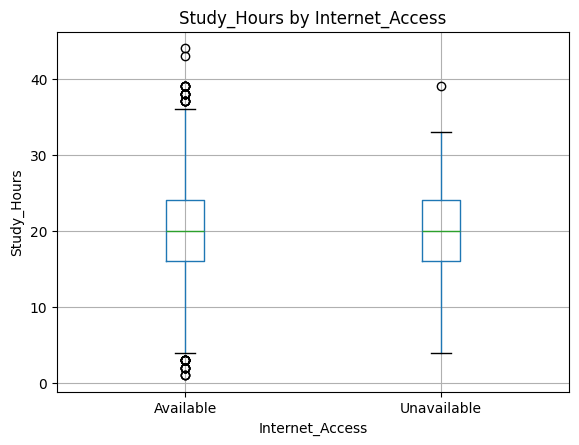

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column="Study_Hours", by="Internet_Access")
plt.title("Study_Hours by Internet_Access")
plt.suptitle("")  # Remove default "Boxplot grouped by" titlea
plt.xlabel("Internet_Access")
plt.ylabel("Study_Hours")
plt.show()

#there may not be a meaningful difference between those with or without internet access (the median lines are the same)

Remove extreme values according to boxplot definition.

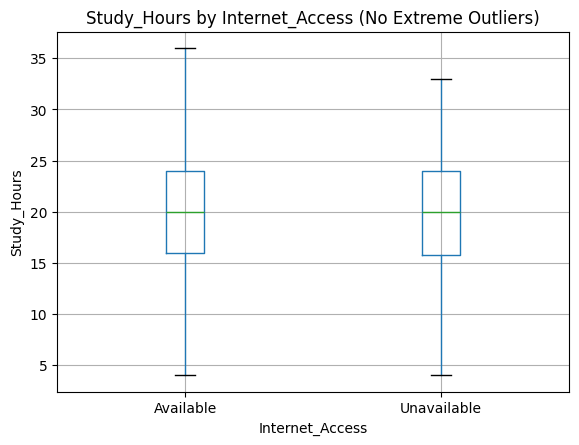

In [ ]:
#remove those outliers using the 1.5×IQR (Interquartile Range) rule

Q1 = df["Study_Hours"].quantile(0.25)
Q3 = df["Study_Hours"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df["Study_Hours"] >= lower_bound) &
    (df["Study_Hours"] <= upper_bound)
]

#check the boxplot after removing outliers

df_no_outliers.boxplot(column="Study_Hours", by="Internet_Access")
plt.title("Study_Hours by Internet_Access (No Extreme Outliers)")
plt.suptitle("")
plt.xlabel("Internet_Access")
plt.ylabel("Study_Hours")
plt.show()

Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

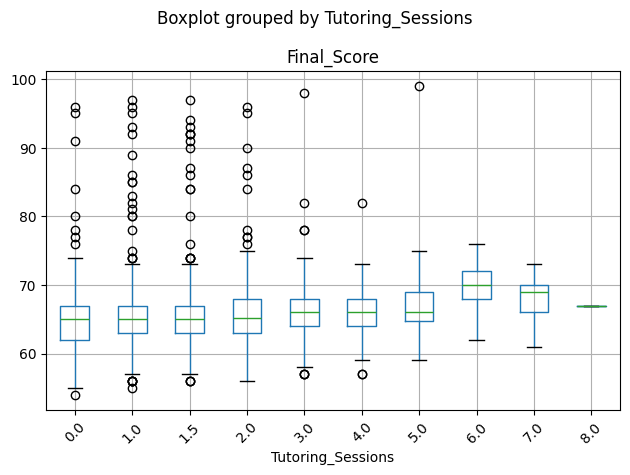

In [ ]:
# floats to rounded or categorical labels
df["Tutoring_Sessions"] = df["Tutoring_Sessions"].round(1)
ax = df.boxplot(column="Final_Score", by="Tutoring_Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

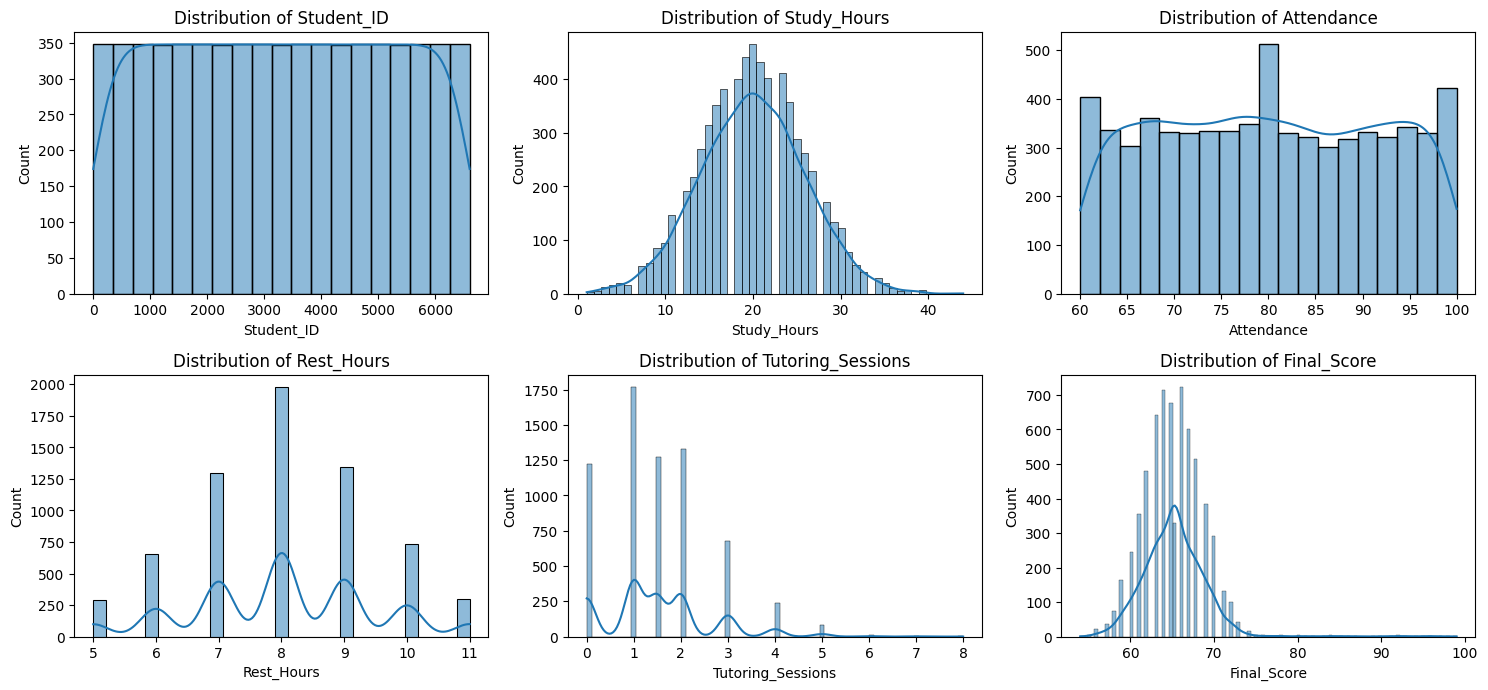

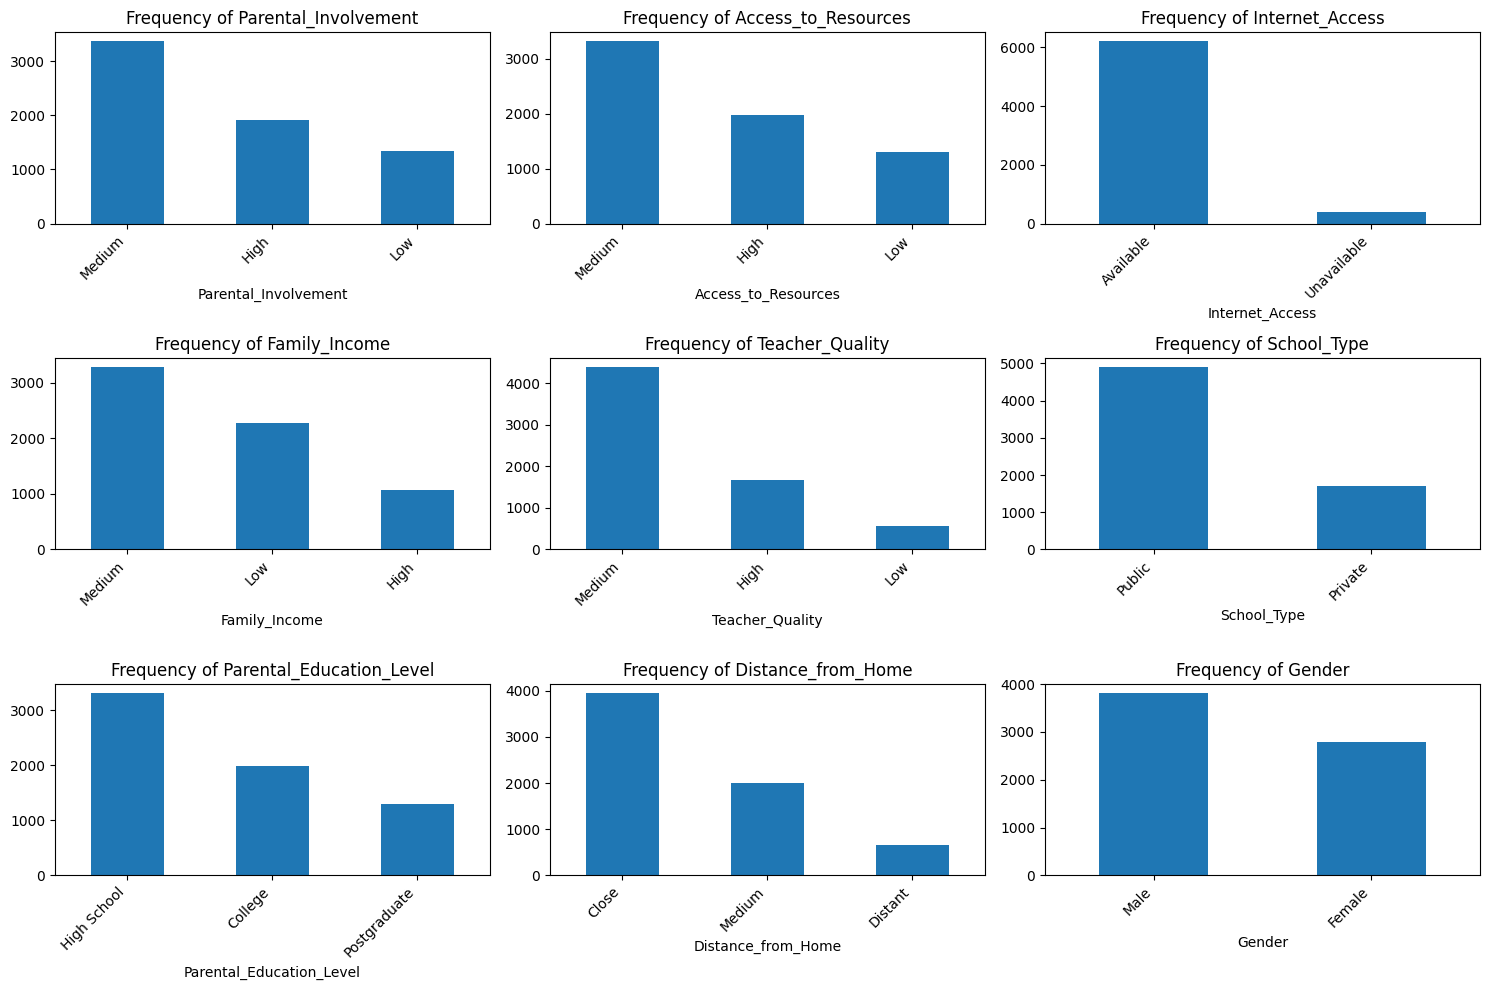

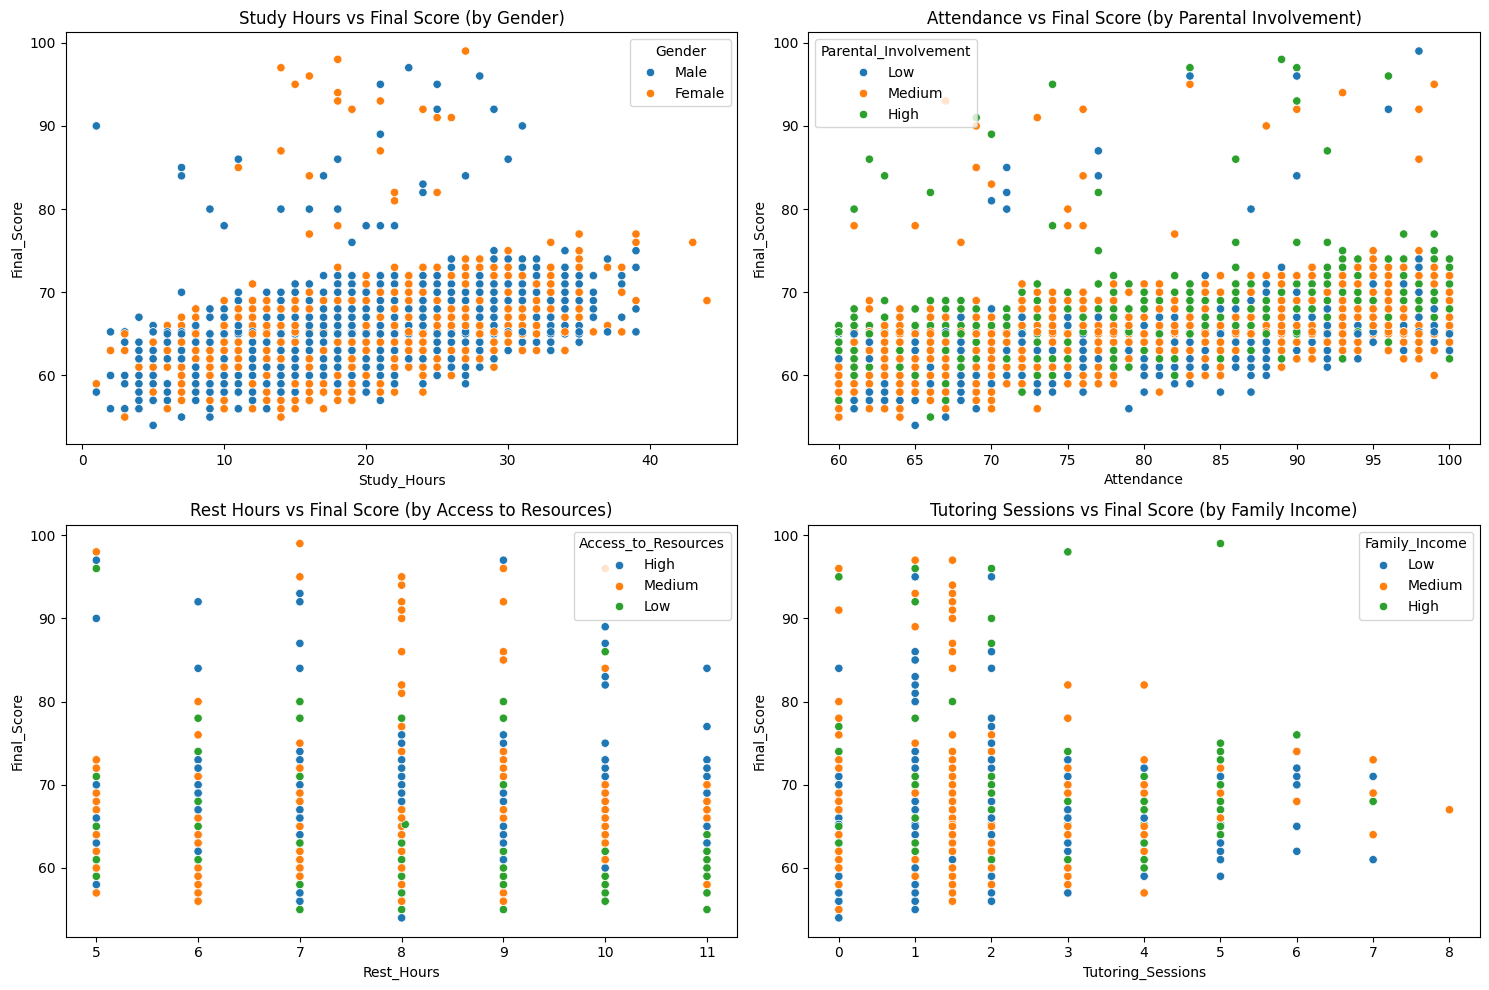

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(merged_all.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(merged_all[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Bar charts for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(merged_all.select_dtypes(include=['object', 'category']).columns):
    plt.subplot(3, 3, i + 1)
    merged_all[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Scatter plots for numerical features
plt.figure(figsize=(15,10))

# Study Hours vs Final Score, colored by Gender
plt.subplot(2,2,1)
sns.scatterplot(x='Study_Hours', y='Final_Score', hue='Gender', data=merged_all)
plt.title('Study Hours vs Final Score (by Gender)')

# Attendance vs Final Score, colored by Parental Involvement
plt.subplot(2,2,2)
sns.scatterplot(x='Attendance', y='Final_Score', hue='Parental_Involvement', data=merged_all)
plt.title('Attendance vs Final Score (by Parental Involvement)')

# Rest Hours vs Final Score, colored by Access to Resources
plt.subplot(2,2,3)
sns.scatterplot(x='Rest_Hours', y='Final_Score', hue='Access_to_Resources', data=merged_all)
plt.title('Rest Hours vs Final Score (by Access to Resources)')

# Tutoring Sessions vs Final Score, colored by Family Income
plt.subplot(2,2,4)
sns.scatterplot(x='Tutoring_Sessions', y='Final_Score', hue='Family_Income', data=merged_all)
plt.title('Tutoring Sessions vs Final Score (by Family Income)')

plt.tight_layout()
plt.show()